In [1]:
import numpy as np
import pandas as pd
# import plotly.express as px
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12,8), dpi= 100)

# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

import tensorflow as tf

data = pd.read_csv (r'C:\Users\suwad\OneDrive - Middlesex University\Desktop\MDX\Modules\8. CST4444 Individual Project\06. Rsearch Datasets\Processed\Final-Feature-Engineered-Dataset.csv')
pd.options.display.max_columns = None
data

,Season,Week,Home_Team,Away_Team,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP,HomeTeamLP,AwayTeamLP,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,VCH,VCD,VCA,Home Team Attack,Away Team Attack,Home Team Defense,Away Team Defense,Home Team Midfield,Away Team Midfield,Home Team Overall,Away Team Overall,Home Team Rank,Away Team Rank,Home Team Rating,Away Team Rating,year,month,GSA,GCA,PA,LPA,B365,ATTA,DEFA,MIDA,OVRA,RNKA,TMRA
0,11,1,Blackburn,Wolves,NH,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0,0,0,0,-2,15,17,2.20,3.20,3.50,2,3.3,3.6,2,3.3,3.3,2.15,3.4,3.60,74,77,73,73,75,73,74,74,14,13,3.5,3.5,2011,8,0,0,0,1,1,0,0,1,0,0,0
1,11,1,Fulham,Aston Villa,NH,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0,0,0,0,-1,8,9,2.20,3.20,3.50,2.05,3.3,3.45,2.2,3.2,3,2.15,3.3,3.75,80,76,74,75,76,75,76,76,7,9,4.0,4.0,2011,8,0,0,0,1,1,1,0,1,0,1,0
2,11,1,Liverpool,Sunderland,NH,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0,0,0,0,-4,6,10,1.57,3.60,7.00,1.45,3.85,7.5,1.4,4.1,7,1.53,4.0,7.50,81,78,80,74,79,75,80,75,5,12,4.5,4.0,2011,8,0,0,0,1,1,1,1,1,1,1,1
3,11,1,QPR,Bolton,NH,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0,0,0,0,6,20,14,2.40,3.25,3.00,2.25,3.25,3.05,2.3,3.2,2.8,2.38,3.3,3.30,79,72,75,72,76,74,75,74,11,15,4.0,3.5,2011,8,0,0,0,0,1,1,1,1,1,1,1
4,11,1,Wigan,Norwich,NH,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0,0,0,0,-4,16,20,2.20,3.20,3.50,2.05,3.25,3.5,1.9,3.3,3.7,2.20,3.4,3.50,71,74,73,69,71,71,72,71,18,19,3.5,3.5,2011,8,0,0,0,1,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,21,38,Crystal Palace,Man United,H,49,57,46,56,45,58,L,D,W,W,D,L,W,D,L,L,0,0,0,0,0,0,0,0,3,1,-13,4,12,14,2,3.00,3.60,2.25,3,3.5,2.25,3.15,3.55,2.2,3.00,3.5,2.20,77,82,75,81,76,83,76,83,14,4,4.0,5.0,2022,5,0,1,0,0,0,0,0,0,0,0,0
4100,21,38,Leicester,Southampton,H,58,42,58,63,49,40,D,W,W,L,L,L,L,L,D,L,0,0,0,0,0,0,1,0,0,-21,9,6,-10,5,15,1.85,4.00,3.80,1.85,3.9,3.8,1.85,3.95,3.8,1.83,3.8,3.80,80,75,78,76,80,76,80,76,6,16,4.5,4.0,2022,5,1,1,1,1,1,1,1,1,1,1,1
4101,21,38,Liverpool,Wolves,H,91,37,25,40,89,51,W,W,D,W,W,D,L,D,L,L,0,0,0,0,0,0,0,0,66,-3,38,11,-10,3,13,1.14,8.50,15.00,1.16,7.75,15,1.17,7.75,16,1.13,8.0,19.00,86,78,85,78,84,80,85,78,1,10,5.0,4.0,2022,5,1,1,1,1,1,1,1,1,1,1,1
4102,21,38,Man City,Aston Villa,H,96,50,24,51,90,45,D,W,W,W,W,D,D,L,W,W,0,0,0,0,0,0,0,0,72,-1,45,5,-10,1,11,1.16,8.00,17.00,1.17,8,15,1.15,7.5,18,1.13,7.5,18.00,84,79,86,79,87,78,85,78,2,9,5.0,4.0,2022,5,1,1,1,1,1,1,1,1,1,1,1


In [2]:
data["Home_Team"] = data["Home_Team"].astype("category").cat.codes
data["Away_Team"] = data["Away_Team"].astype("category").cat.codes

# data["FTR"] = data["FTR"].astype("category").cat.codes

# data["HM1"] = data["HM1"].astype("category").cat.codes
# data["HM2"] = data["HM2"].astype("category").cat.codes
# data["HM3"] = data["HM3"].astype("category").cat.codes
# data["HM4"] = data["HM4"].astype("category").cat.codes
# data["HM5"] = data["HM5"].astype("category").cat.codes

# data["AM1"] = data["AM1"].astype("category").cat.codes
# data["AM2"] = data["AM2"].astype("category").cat.codes
# data["AM3"] = data["AM3"].astype("category").cat.codes
# data["AM4"] = data["AM4"].astype("category").cat.codes
# data["AM5"] = data["AM5"].astype("category").cat.codes

data.loc[data['FTR'] == 'NH', 'FTR'] = 0
data.loc[data['FTR'] == 'H', 'FTR'] = 1

streaks = ['HM1','HM2','HM3','HM4','HM5','AM1','AM2','AM3','AM4','AM5']

for streak in streaks:
    data.loc[data[streak] == 'M', streak] = -2
    data.loc[data[streak] == 'W', streak] = 1
    data.loc[data[streak] == 'L', streak] = -1 # try with 0 as well
    data.loc[data[streak] == 'D', streak] = 0

data

,Season,Week,Home_Team,Away_Team,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP,HomeTeamLP,AwayTeamLP,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,VCH,VCD,VCA,Home Team Attack,Away Team Attack,Home Team Defense,Away Team Defense,Home Team Midfield,Away Team Midfield,Home Team Overall,Away Team Overall,Home Team Rank,Away Team Rank,Home Team Rating,Away Team Rating,year,month,GSA,GCA,PA,LPA,B365,ATTA,DEFA,MIDA,OVRA,RNKA,TMRA
0,11,1,2,35,0,0,0,0,0,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,-2,15,17,2.20,3.20,3.50,2,3.3,3.6,2,3.3,3.3,2.15,3.4,3.60,74,77,73,73,75,73,74,74,14,13,3.5,3.5,2011,8,0,0,0,1,1,0,0,1,0,0,0
1,11,1,12,1,0,0,0,0,0,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,-1,8,9,2.20,3.20,3.50,2.05,3.3,3.45,2.2,3.2,3,2.15,3.3,3.75,80,76,74,75,76,75,76,76,7,9,4.0,4.0,2011,8,0,0,0,1,1,1,0,1,0,1,0
2,11,1,17,28,0,0,0,0,0,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,-4,6,10,1.57,3.60,7.00,1.45,3.85,7.5,1.4,4.1,7,1.53,4.0,7.50,81,78,80,74,79,75,80,75,5,12,4.5,4.0,2011,8,0,0,0,1,1,1,1,1,1,1,1
3,11,1,23,3,0,0,0,0,0,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,6,20,14,2.40,3.25,3.00,2.25,3.25,3.05,2.3,3.2,2.8,2.38,3.3,3.30,79,72,75,72,76,74,75,74,11,15,4.0,3.5,2011,8,0,0,0,0,1,1,1,1,1,1,1
4,11,1,34,22,0,0,0,0,0,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,-4,16,20,2.20,3.20,3.50,2.05,3.25,3.5,1.9,3.3,3.7,2.20,3.4,3.50,71,74,73,69,71,71,72,71,18,19,3.5,3.5,2011,8,0,0,0,1,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,21,38,10,19,1,49,57,46,56,45,58,-1,0,1,1,0,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,3,1,-13,4,12,14,2,3.00,3.60,2.25,3,3.5,2.25,3.15,3.55,2.2,3.00,3.5,2.20,77,82,75,81,76,83,76,83,14,4,4.0,5.0,2022,5,0,1,0,0,0,0,0,0,0,0,0
4100,21,38,16,26,1,58,42,58,63,49,40,0,1,1,-1,-1,-1,-1,-1,0,-1,0,0,0,0,0,0,1,0,0,-21,9,6,-10,5,15,1.85,4.00,3.80,1.85,3.9,3.8,1.85,3.95,3.8,1.83,3.8,3.80,80,75,78,76,80,76,80,76,6,16,4.5,4.0,2022,5,1,1,1,1,1,1,1,1,1,1,1
4101,21,38,17,35,1,91,37,25,40,89,51,1,1,0,1,1,0,-1,0,-1,-1,0,0,0,0,0,0,0,0,66,-3,38,11,-10,3,13,1.14,8.50,15.00,1.16,7.75,15,1.17,7.75,16,1.13,8.0,19.00,86,78,85,78,84,80,85,78,1,10,5.0,4.0,2022,5,1,1,1,1,1,1,1,1,1,1,1
4102,21,38,18,1,1,96,50,24,51,90,45,0,1,1,1,1,0,0,-1,1,1,0,0,0,0,0,0,0,0,72,-1,45,5,-10,1,11,1.16,8.00,17.00,1.17,8,15,1.15,7.5,18,1.13,7.5,18.00,84,79,86,79,87,78,85,78,2,9,5.0,4.0,2022,5,1,1,1,1,1,1,1,1,1,1,1


In [3]:
data = data.drop(['BWH','BWD','BWA','IWH','IWD','IWA','VCH','VCD','VCA'], axis=1)
data = data.drop(['B365H','B365D','B365A'], axis=1)
data = data.drop(['HTGD','ATGD','DiffPts','DiffFormPts','DiffLP'], axis=1)

In [4]:
from sklearn.preprocessing import MaxAbsScaler

abs_scaler = MaxAbsScaler()
abs_scaler.fit(data)

abs_scaler.max_abs_

scaled_data = abs_scaler.transform(data)
df_scaled = pd.DataFrame(scaled_data, columns=data.columns)

df_scaled

,Season,Week,Home_Team,Away_Team,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HomeTeamLP,AwayTeamLP,Home Team Attack,Away Team Attack,Home Team Defense,Away Team Defense,Home Team Midfield,Away Team Midfield,Home Team Overall,Away Team Overall,Home Team Rank,Away Team Rank,Home Team Rating,Away Team Rating,year,month,GSA,GCA,PA,LPA,B365,ATTA,DEFA,MIDA,OVRA,RNKA,TMRA
0,0.52381,0.026316,0.057143,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.85,0.831461,0.865169,0.848837,0.848837,0.852273,0.829545,0.870588,0.870588,0.70,0.65,0.7,0.7,0.99456,0.666667,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.52381,0.026316,0.342857,0.028571,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.40,0.45,0.898876,0.853933,0.860465,0.872093,0.863636,0.852273,0.894118,0.894118,0.35,0.45,0.8,0.8,0.99456,0.666667,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.52381,0.026316,0.485714,0.800000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.30,0.50,0.910112,0.876404,0.930233,0.860465,0.897727,0.852273,0.941176,0.882353,0.25,0.60,0.9,0.8,0.99456,0.666667,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.52381,0.026316,0.657143,0.085714,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.70,0.887640,0.808989,0.872093,0.837209,0.863636,0.840909,0.882353,0.870588,0.55,0.75,0.8,0.7,0.99456,0.666667,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.52381,0.026316,0.971429,0.628571,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.80,1.00,0.797753,0.831461,0.848837,0.802326,0.806818,0.806818,0.847059,0.835294,0.90,0.95,0.7,0.7,0.99456,0.666667,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,1.00000,1.000000,0.285714,0.542857,1.0,0.480392,0.542857,0.554217,0.708861,0.478723,0.597938,-0.5,0.0,0.5,0.5,0.0,-0.5,0.5,0.0,-0.5,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.70,0.10,0.865169,0.921348,0.872093,0.941860,0.863636,0.943182,0.894118,0.976471,0.70,0.20,0.8,1.0,1.00000,0.416667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4100,1.00000,1.000000,0.457143,0.742857,1.0,0.568627,0.400000,0.698795,0.797468,0.521277,0.412371,0.0,0.5,0.5,-0.5,-0.5,-0.5,-0.5,-0.5,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.25,0.75,0.898876,0.842697,0.906977,0.883721,0.909091,0.863636,0.941176,0.894118,0.30,0.80,0.9,0.8,1.00000,0.416667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4101,1.00000,1.000000,0.485714,1.000000,1.0,0.892157,0.352381,0.301205,0.506329,0.946809,0.525773,0.5,0.5,0.0,0.5,0.5,0.0,-0.5,0.0,-0.5,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.65,0.966292,0.876404,0.988372,0.906977,0.954545,0.909091,1.000000,0.917647,0.05,0.50,1.0,0.8,1.00000,0.416667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4102,1.00000,1.000000,0.514286,0.028571,1.0,0.941176,0.476190,0.289157,0.645570,0.957447,0.463918,0.0,0.5,0.5,0.5,0.5,0.0,0.0,-0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.55,0.943820,0.887640,1.000000,0.918605,0.988636,0.886364,1.000000,0.917647,0.10,0.45,1.0,0.8,1.00000,0.416667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [5]:
# !pip install fast_ml

# from fast_ml.model_development import train_valid_test_split

# X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df_scaled, target = 'FTR', 
#                                                                             train_size=0.8, valid_size=0.1, test_size=0.1)

# print(X_train.shape), print(y_train.shape)
# print(X_valid.shape), print(y_valid.shape)
# print(X_test.shape), print(y_test.shape)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [7]:
model = Sequential([
      Dense(55, input_shape=(55,), activation='relu'),
      Dense(27, activation='relu'),
      Dense(8, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 55)                3080      
                                                                 
 dense_1 (Dense)             (None, 27)                1512      
                                                                 
 dense_2 (Dense)             (None, 8)                 224       
                                                                 
Total params: 4,816
Trainable params: 4,816
Non-trainable params: 0
_________________________________________________________________


In [9]:
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [10]:
model.compile(
    Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
y = df_scaled.loc[:, 'FTR']
X = df_scaled.drop('FTR', axis=1)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=67)

In [13]:
history = model.fit(
    x=X_train, 
    y=y_train, 
    validation_split=0.8, 
    batch_size=10, 
    epochs=30, 
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()], 
    shuffle=True, 
    verbose=2
)

Epoch 1/30
66/66 - 1s - loss: 1.9500 - accuracy: 0.2256 - val_loss: 1.6284 - val_accuracy: 0.4754 - lr: 1.0000e-04 - 1s/epoch - 16ms/step
Epoch 2/30
66/66 - 0s - loss: 1.4099 - accuracy: 0.5396 - val_loss: 1.2189 - val_accuracy: 0.5767 - lr: 1.0000e-04 - 310ms/epoch - 5ms/step
Epoch 3/30
66/66 - 0s - loss: 1.0863 - accuracy: 0.6006 - val_loss: 0.9817 - val_accuracy: 0.6068 - lr: 1.0000e-04 - 316ms/epoch - 5ms/step
Epoch 4/30
66/66 - 0s - loss: 0.9050 - accuracy: 0.6341 - val_loss: 0.8514 - val_accuracy: 0.6384 - lr: 1.0000e-04 - 317ms/epoch - 5ms/step
Epoch 5/30
66/66 - 0s - loss: 0.8035 - accuracy: 0.6509 - val_loss: 0.7765 - val_accuracy: 0.6475 - lr: 1.0000e-04 - 301ms/epoch - 5ms/step
Epoch 6/30
66/66 - 0s - loss: 0.7428 - accuracy: 0.6494 - val_loss: 0.7314 - val_accuracy: 0.6483 - lr: 1.0000e-04 - 314ms/epoch - 5ms/step
Epoch 7/30
66/66 - 0s - loss: 0.7041 - accuracy: 0.6524 - val_loss: 0.7021 - val_accuracy: 0.6521 - lr: 1.0000e-04 - 309ms/epoch - 5ms/step
Epoch 8/30
66/66 - 0s 

In [28]:
y_pred = model.evaluate(X_test, y_test, batch_size=10)

83/83 [==============================] - 0s 1ms/step - loss: 0.6137 - accuracy: 0.6626


[0.6137014627456665, 0.6626065969467163]

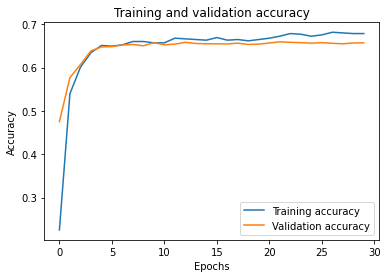

In [15]:
# For plotting with matplotlib
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

        loss  accuracy  val_loss  val_accuracy      lr
0   1.949984  0.225610  1.628440      0.475447  0.0001
1   1.409858  0.539634  1.218886      0.576703  0.0001
2   1.086274  0.600610  0.981655      0.606776  0.0001
3   0.904957  0.634146  0.851409      0.638371  0.0001
4   0.803528  0.650915  0.776536      0.647507  0.0001
5   0.742822  0.649390  0.731375      0.648268  0.0001
6   0.704116  0.652439  0.702098      0.652075  0.0001
7   0.679275  0.660061  0.683532      0.653217  0.0001
8   0.661269  0.660061  0.670321      0.650171  0.0001
9   0.648388  0.657012  0.660526      0.657404  0.0001
10  0.638772  0.657012  0.654587      0.652455  0.0001
11  0.631892  0.667683  0.649363      0.653978  0.0001
12  0.627471  0.666159  0.646579      0.658165  0.0001
13  0.622075  0.664634  0.643287      0.655501  0.0001
14  0.619058  0.663110  0.641838      0.654739  0.0001
15  0.615986  0.669207  0.640076      0.654739  0.0001
16  0.612729  0.663110  0.638162      0.654359  0.0001
17  0.6101

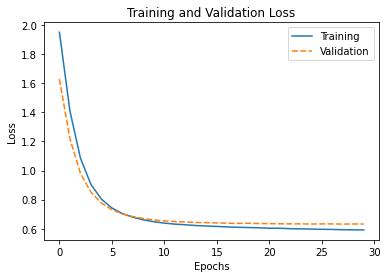

In [16]:
# For plotting with seaborn
import seaborn as sns  

# Create pandas DataFrame
df_history = pd.DataFrame(history.history)
print(df_history)

# Plot using Seaborn
my_plot = sns.lineplot(data=df_history[["loss","val_loss"]])
my_plot.set_xlabel('Epochs')
my_plot.set_ylabel('Loss')
plt.legend(labels=["Training", "Validation"])
plt.title('Training and Validation Loss')
plt.show()

In [33]:
predictions = np.argmax(model.predict(X_test),axis=1)
predictions.size

26/26 [==============================] - 0s 1000us/step


821

In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.6626065773447016

(<Figure size 288x360 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

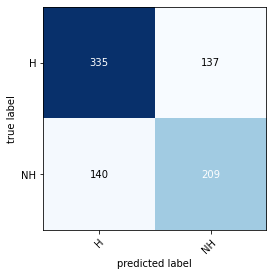

In [42]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, predictions)

plot_confusion_matrix(conf_mat=mat, figsize=(4,5), class_names = ['H', 'NH'])

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.60      0.60      0.60       349
           0       0.71      0.71      0.71       472

    accuracy                           0.66       821
   macro avg       0.65      0.65      0.65       821
weighted avg       0.66      0.66      0.66       821



26/26 [==============================] - 0s 1ms/step


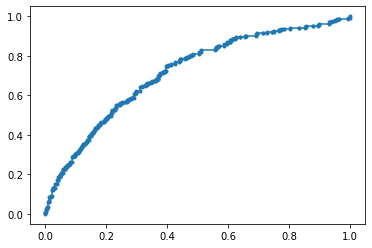

In [98]:
from sklearn.metrics import roc_curve, auc

y_pred = (model.predict(X_test)[:,1]).ravel()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

26/26 [==============================] - 0s 1ms/step


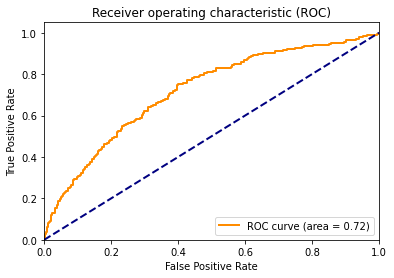

In [115]:
import numpy as np
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, (model.predict(X_test)[:,1]))
roc_auc = metrics.auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [560]:
model.save('Final Model/New Model Format', save_format='tf')

INFO:tensorflow:Assets written to: Final Model/New Model Format\assets


In [561]:
model.save('Final Model/Old Model Format/H5.h5', save_format='h5')

In [562]:
model.save('Final Model/Test/model.h5')
model_json = model.to_json()
with open("Final Model/Test/model.json", "w") as json_file:
    json_file.write(model_json)

In [563]:
model

In [564]:
np.argmax(model.predict(X_test[:10]), 1)

1/1 [==============================] - 0s 55ms/step


array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [565]:
X_test[X_test.columns[0:]].to_numpy()[10]

array([ 1.        ,  1.        ,  0.25714286,  0.88571429,  0.7254902 ,
        0.31428571,  0.38554217,  0.94936709,  0.75531915,  0.2371134 ,
        0.        ,  0.5       ,  0.        , -0.5       ,  0.        ,
       -0.5       ,  0.        , -0.5       , -0.5       , -0.5       ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.2       ,  1.        ,
        0.94382022,  0.83146067,  0.96511628,  0.86046512,  0.96590909,
        0.85227273,  0.98823529,  0.87058824,  0.15      ,  0.95      ,
        1.        ,  0.7       ,  1.        ,  0.41666667,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ])

In [566]:
X_test[:1]

,Season,Week,Home_Team,Away_Team,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HomeTeamLP,AwayTeamLP,Home Team Attack,Away Team Attack,Home Team Defense,Away Team Defense,Home Team Midfield,Away Team Midfield,Home Team Overall,Away Team Overall,Home Team Rank,Away Team Rank,Home Team Rating,Away Team Rating,year,month,GSA,GCA,PA,LPA,B365,ATTA,DEFA,MIDA,OVRA,RNKA,TMRA
1766,0.714286,0.868421,0.857143,0.542857,0.558824,0.371429,0.301205,0.341772,0.659574,0.546392,0.0,0.5,0.5,0.0,-0.5,0.5,0.5,-0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.2,0.921348,0.775281,0.918605,0.895349,0.886364,0.909091,0.929412,0.952941,0.25,0.2,0.9,1.0,0.997033,0.333333,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [567]:
y_test[:10]

1766    1.0
2657    0.0
2661    0.0
2725    1.0
1648    0.0
1621    1.0
1845    0.0
3836    0.0
1774    0.0
1687    1.0
Name: FTR, dtype: float64

In [568]:
model.predict(X_test[:10])

1/1 [==============================] - 0s 20ms/step


array([[0.99213874, 0.9930311 , 0.01474226, 0.02866573, 0.06129901,
        0.10122725, 0.03361177, 0.07085967],
       [0.9891599 , 0.9854058 , 0.01871117, 0.05606803, 0.0521743 ,
        0.16972195, 0.03063074, 0.12840739],
       [0.97898144, 0.9340507 , 0.0726152 , 0.09130382, 0.14302762,
        0.18649341, 0.05487538, 0.10829684],
       [0.9891372 , 0.9704806 , 0.0329657 , 0.05977451, 0.08010874,
        0.18413997, 0.03195231, 0.10456177],
       [0.9831652 , 0.9702617 , 0.04126983, 0.06708292, 0.10706063,
        0.17024773, 0.0548089 , 0.11094239],
       [0.98360646, 0.9801307 , 0.03394544, 0.05928776, 0.09014423,
        0.16539776, 0.04766361, 0.12292544],
       [0.9901938 , 0.99279654, 0.01806404, 0.03152607, 0.07246367,
        0.10782995, 0.02524772, 0.09083959],
       [0.98299444, 0.9578459 , 0.05481543, 0.07195741, 0.13565223,
        0.16639124, 0.04745726, 0.09667914],
       [0.99050593, 0.9966697 , 0.00853511, 0.01921218, 0.05077767,
        0.06369024, 0.018457